<a href="https://colab.research.google.com/github/milicaci/obuznie/blob/master/DZ_ITOG4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

1.Загружен файл HR.csv в pandas dataframe

In [29]:
df = pd.read_csv('HR.csv',encoding='UTF-8', decimal=",")

In [30]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.8,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.4,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   satisfaction_level     14999 non-null  object
 1   last_evaluation        14999 non-null  object
 2   number_project         14999 non-null  int64 
 3   average_montly_hours   14999 non-null  int64 
 4   time_spend_company     14999 non-null  int64 
 5   Work_accident          14999 non-null  int64 
 6   left                   14999 non-null  int64 
 7   promotion_last_5years  14999 non-null  int64 
 8   department             14999 non-null  object
 9   salary                 14999 non-null  object
dtypes: int64(6), object(4)
memory usage: 1.1+ MB


In [32]:
df['satisfaction_level'] = df['satisfaction_level'].astype('float64')

In [33]:
df['last_evaluation'] = df['last_evaluation'].astype('float64')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2. Рассчитатаны основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [35]:
df.describe() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Расчет моды

In [36]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


3. Рассчитана и визуализирована корреляционна матрица для количественных переменных.Определины две самые скоррелированные и две наименее скоррелированные переменные.

In [37]:
numerik_col = ['number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']

In [38]:
corr_matrix = df.loc[:,numerik_col].corr()
#print(corr_matrix)

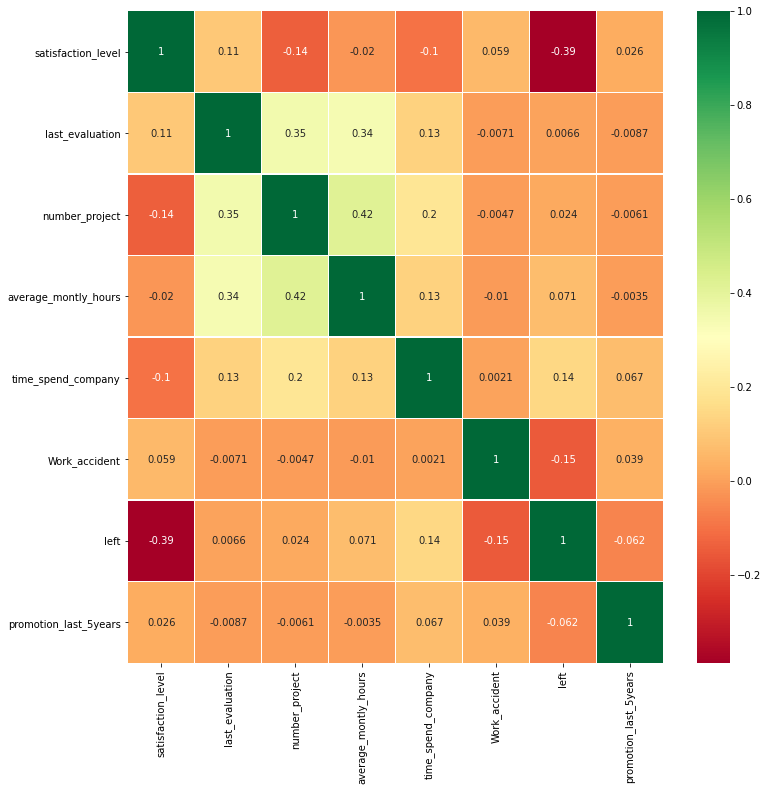

In [39]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()

**Вывод**: два самых скоррелированных показателя это number_projects и average_monthly_hours​. И два самых нескоррелированных показателя это left​ и Work_accident

4.Рассчитано сколько сотрудников работает в каждом департаменте.

In [40]:
df_kol = df.groupby('department').count()['satisfaction_level']
df_kol

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

5. Показано распределение сотрудников по зарплатам.

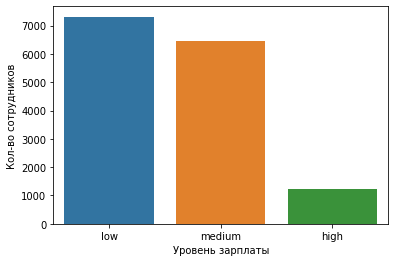

In [41]:
sns.countplot(x='salary', data=df)
plt.xlabel('Уровень зарплаты')
plt.ylabel('Кол-во сотрудников')
plt.show()

6.Показано распределение сотрудников по зарплатам в каждом департаменте по отдельности

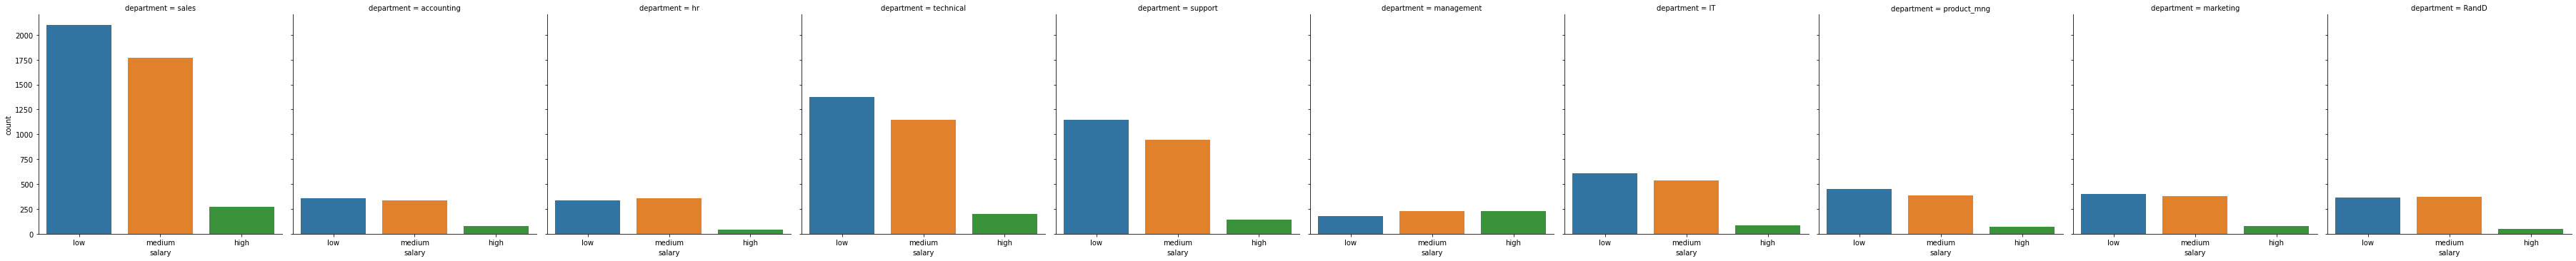

In [42]:
sns.catplot(x='salary', col='department', data=df, kind='count')
plt.show()

7.Проверили гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом/

*   H0 Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
*   H1 Сотрудники с высоким окладом проводят на работе меньше времени, чем сотрудники с низким окладом




In [43]:
alpha = 0.05  
df_g = st.ttest_ind(df[df['salary'] == 'high']['average_montly_hours'], df[df['salary'] == 'low']['average_montly_hours'], equal_var=False)
print(df_g)
if (df_g.pvalue < alpha):
    print('Отвергаем Н0 гипотезу. Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом')
else:
    print('Не отвергаем Н0 гипотезу. Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем Н0 гипотезу. Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


8. Расчитали показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
*   Доля сотрудников с повышением за последние 5 лет
*   Средняя степень удовлетворенности
*   Среднее количество проектов
*   Новый пункт



In [44]:
# среди уволившихся сотрудников
df_a = (df[df.left == 1][df.promotion_last_5years == 1]['promotion_last_5years'].count())/(df[df.left == 1]['left'].count())
df_b = df[df.left == 1]['satisfaction_level'].mean()
df_c = df[df.left == 1]['number_project'].mean()
# среди оставшихся сотрудников
df_a1 = (df[df.left == 0][df.promotion_last_5years == 1]['promotion_last_5years'].count())/(df[df.left == 0]['left'].count())
df_b1 = df[df.left == 0]['satisfaction_level'].mean()
df_c1 = df[df.left == 0]['number_project'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [45]:
df_n = pd.DataFrame({'Доля сотрудников с повышением за последние 5 лет':pd.Series([df_a, df_a1],
                     index=['Среди уволившихся сотрудников', 'Среди оставшихся сотрудников']),
                     'Средняя степень удовлетворенности':pd.Series([df_b,df_b1],index=['Среди уволившихся сотрудников', 'Среди оставшихся сотрудников']),
                     'Среднее количество проектов':pd.Series([df_c,df_c1],index=['Среди уволившихся сотрудников', 'Среди оставшихся сотрудников'])})
#df_n

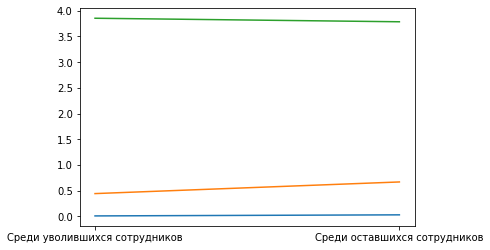

In [46]:
plt.plot(df_n)
plt.show()

**Вывод**: Из графика видно, что среди оставшихся сотрудников, больше  тех у кого средняя степень удовлетворенности  выше, чем у тех кто уволился. Доля сотрудников с повышением за последние 5 лет 

9. Разделиены данные на тестовую и обучающую выборки. Построена модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).Оценино качество модели на тестовой выборки.

In [47]:
df_t = df.drop(['department', 'salary'], axis=1)
X_train, X_test, y_train, y_test = train_test_split((df_t), df['left'], test_size=0.30)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [48]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [49]:
df_tt = pd.DataFrame([y_test.values, lda.predict(X_test)]).T


In [50]:
df_tt1 = accuracy_score(y_test, lda.predict(X_test))
print(f'Точность модели: {round(df_tt1*100,2)}%')

Точность модели: 76.89%


In [51]:
df_tt2 = confusion_matrix(y_test, lda.predict(X_test))
df_tt2

array([[3192,  248],
       [ 792,  268]])

In [52]:
target_names = ['Уволился', 'Не уволился']
report = classification_report(y_test, lda.predict(X_test), target_names=target_names) 
print(report)

              precision    recall  f1-score   support

    Уволился       0.80      0.93      0.86      3440
 Не уволился       0.52      0.25      0.34      1060

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.73      0.77      0.74      4500



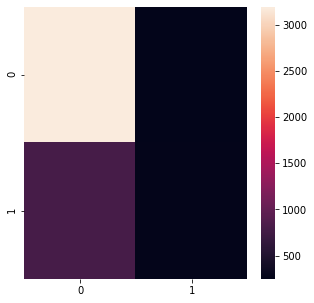

In [53]:
sns.heatmap(df_tt2)
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.show()